# CS498  Homework4
------
Dingcheng Yue
Ziqiao Ding
Kyle Herdon

### Problem 4.3

#### problem1

We first load the data of the iris,

and the plot is shown below

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_decomposition import PLSCanonical
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline


In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('data/iris.data', header=None, names=columns)

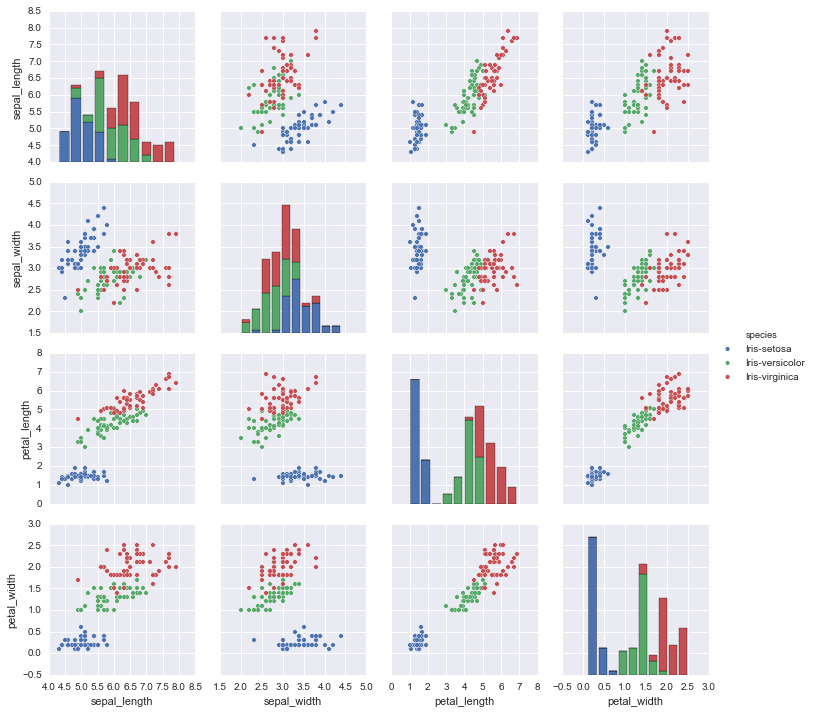

In [4]:
sns.pairplot(iris, hue="species")

#### problem 2

The next thing we are going to do is use PAC and we keep the first two components.

However, we do notice that different dimesion has different scale, then we should scale them to the same.

As we can see that the data is well seperated into three cluster. 

As we can see that three cluster is elongated along the second axis. 

In [7]:
from sklearn.decomposition import PCA
# get the data from the components
datax = iris.iloc[:,:4].as_matrix()
datay = iris['species'].as_matrix()
# Use only two principle components
scaler = StandardScaler()
datax = scaler.fit_transform(datax)
pac = PCA(n_components=2)
datax_2 = pac.fit_transform(datax)

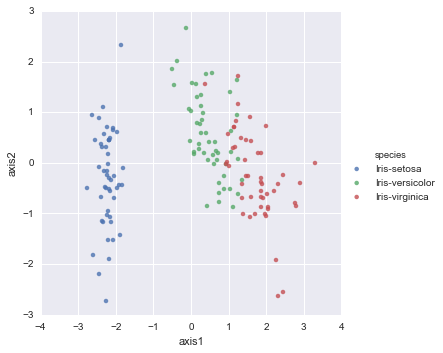

In [8]:
df = pd.DataFrame(dict(axis1=datax_2[:,0], axis2=datax_2[:,1], species=datay))
sns.lmplot("axis1", "axis2", hue="species", data=df, fit_reg=False)

#### problem3

The following is the result of PLS1 code

In [15]:

pls1 = PLSCanonical(n_components=2)
datay_encode = LabelBinarizer(pos_label=1, neg_label=0).fit_transform(datay)
datax_cov, datay_cov = pls1.fit_transform(datax, datay_encode)

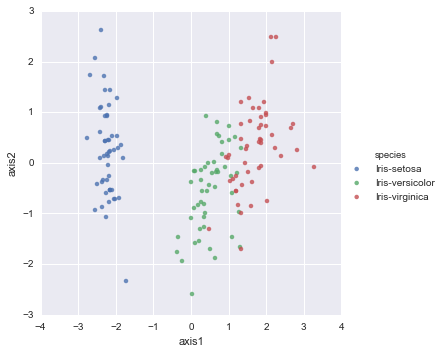

In [16]:
df = pd.DataFrame(dict(axis1=datax_cov[:,0], axis2=datax_cov[:,1], species=datay))
sns.lmplot("axis1", "axis2", hue="species", data=df, fit_reg=False)

### Problem 4.4

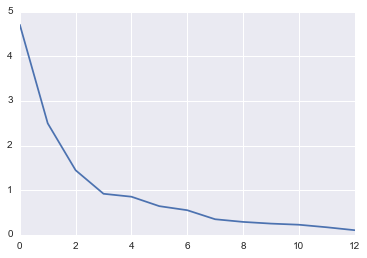

In [97]:

wine = pd.read_csv('data/wine.data', header=None).as_matrix()
scaler = StandardScaler()
datax = wine[:, 1:]
datay = wine[:,0]
scaler.fit(datax)
datax = scaler.transform(datax)
pca = PCA()
pca.fit(datax)
cov = pca.get_covariance()
mtx = sp.linalg.svd(cov, compute_uv=False)

plt.plot(mtx)

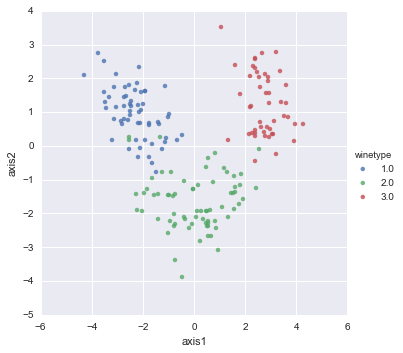

In [98]:
datax_2 = pca.transform(datax)
df = pd.DataFrame(dict(axis1=datax_2[:,0], axis2=datax_2[:,1], winetype=datay))
sns.lmplot("axis1", "axis2", hue="winetype", data=df, fit_reg=False)

### Problem 3.7

In [21]:
cancer = pd.read_csv('data/breast-cancer-wisconsin.data', sep=',', header=None, na_values='?')
cancer.dropna(inplace=True)
datax = cancer.iloc[:,1:10].as_matrix()
datay = cancer.iloc[:,10].as_matrix()
datay_type = np.chararray(datay.shape)
datay_type[datay==2] = 'B'
datay_type[datay==4] = 'N'

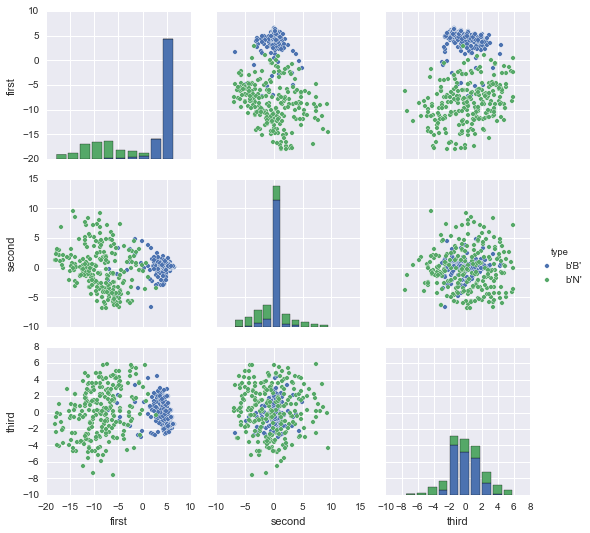

In [22]:

pca = PCA(n_components=3)
datax_3 = pca.fit_transform(datax)
df = pd.DataFrame({'first': datax_3[:,0], 'second': datax_3[:,1], 'third': datax_3[:,2], 'type': datay_type})
sns.pairplot(df, hue='type')

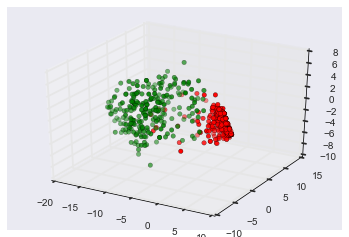

In [23]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
B = datay == 2
N = datay == 4
ax.scatter3D(xs=datax_3[B, 0], ys=datax_3[B, 1], zs=datax_3[B, 2], c='red')
ax.scatter3D(xs=datax_3[N, 0], ys=datax_3[N, 1], zs=datax_3[N, 2], c='green')